In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

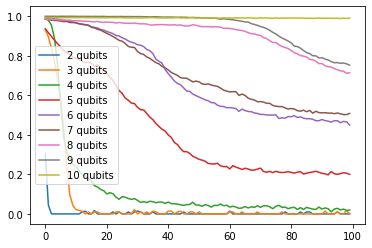

In [25]:
losss = []

for i in range(2, 11):
    path = "../experiments/polygon_ansatz_w/" + str(i) + '/loss_values_qng.csv'
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    plt.plot(loss, label = str(i) + ' qubits')
plt.legend()
plt.show()

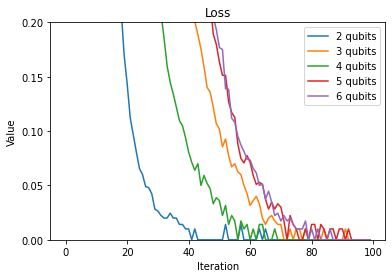

In [53]:
losss = []

for i in range(2, 7):
    path = "../experiments/star_ansatz_ghz/" + str(i) + '/loss_values_sgd.csv'
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    plt.plot(loss, label = str(i) + ' qubits')

plt.xlabel('Iteration')
plt.ylim((0,0.2))
plt.yticks(np.arange(0, 0.25, 0.05))
plt.ylabel('Value')
plt.title('Loss')
plt.legend()
plt.show()

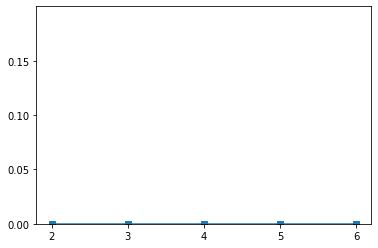

In [62]:
qubits = range(2, 7)
star_ansatz = []
for i in qubits:
    path = "../experiments/star_ansatz_" + 'ghz' + "/" + str(i) + '/loss_values_' + 'sgd' + '.csv'
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    star_ansatz.append((loss[-1]))

plt.ylim((0,0.2))
plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(0, 0.2, 0.05))
plt.plot(qubits, star_ansatz, marker='s', label = 'Star ansatz')


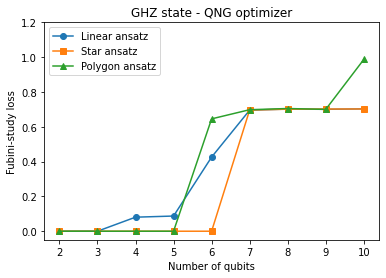

In [26]:
def get_loss(reconstruted_state, optimizer):
    losss_linear, losss_star, losss_polygon = [], [], []
    qubits = range(2, 11)
    for i in qubits:
        path = "../experiments/linear_ansatz_" + reconstruted_state + "/" + str(i) + '/loss_values_' + optimizer + '.csv'
        loss = pd.read_csv(path, sep=",", header=None).to_numpy()
        losss_linear.append(np.min(loss))
    for i in qubits:
        path = "../experiments/star_ansatz_" + reconstruted_state + "/" + str(i) + '/loss_values_' + optimizer + '.csv'
        loss = pd.read_csv(path, sep=",", header=None).to_numpy()
        losss_star.append(np.min(loss))
    for i in qubits:
        path = "../experiments/polygon_ansatz_" + reconstruted_state + "/" + str(i) + '/loss_values_' + optimizer + '.csv'
        loss = pd.read_csv(path, sep=",", header=None).to_numpy()
        losss_polygon.append(np.min(loss))

    plt.plot(qubits, losss_linear, marker='o', label = 'Linear ansatz')
    plt.plot(qubits, losss_star, marker='s', label = 'Star ansatz')
    plt.plot(qubits, losss_polygon, marker='^', label = 'Polygon ansatz')
    plt.xlabel('Number of qubits')
    plt.yticks(np.arange(0, 1.4, 0.2))
    plt.ylabel('Fubini-study loss')
    plt.title(reconstruted_state.upper() + ' state - ' + optimizer.upper() + ' optimizer')
    plt.legend()
    plt.savefig(reconstruted_state.upper() + ' state - ' + optimizer.upper() + ' optimizer.png', dpi = 1000)
    plt.show()

get_loss('ghz', 'qng')

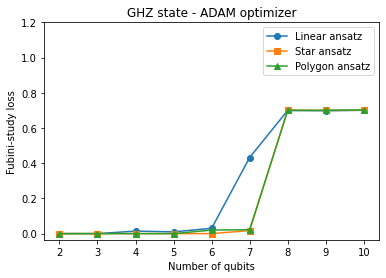

In [27]:
get_loss('ghz', 'adam')

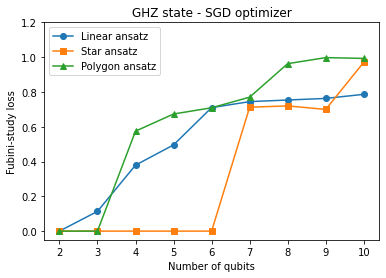

In [28]:
get_loss('ghz', 'sgd')

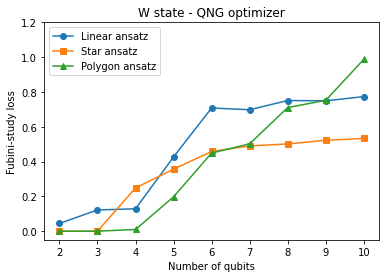

In [31]:
get_loss('w', 'qng')

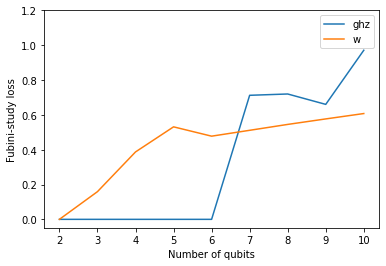

In [43]:
def get_loss(reconstruted_state, optimizer):
    losss_linear, losss_star, losss_polygon = [], [], []
    qubits = range(2, 11)
    for i in qubits:
        path = "../experiments/star_ansatz_" + reconstruted_state + "/" + str(i) + '/loss_values_' + optimizer + '.csv'
        loss = pd.read_csv(path, sep=",", header=None).to_numpy()
        losss_star.append(np.min(loss))

    plt.plot(qubits, losss_star, label = reconstruted_state)
    plt.xlabel('Number of qubits')
    plt.yticks(np.arange(0, 1.4, 0.2))
    plt.ylabel('Fubini-study loss')
    # plt.title(reconstruted_state.upper() + ' state - ' + optimizer.upper() + ' optimizer')
    plt.legend()

get_loss('ghz', 'sgd')
get_loss('w', 'sgd')
plt.show()